Enter a wavelength between 400 and 700 nm :  660


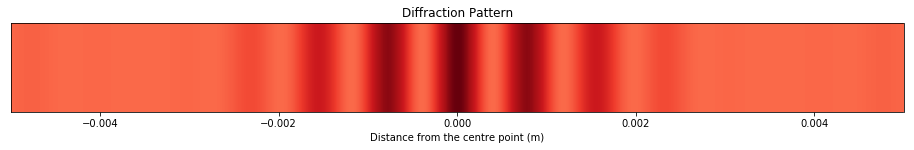

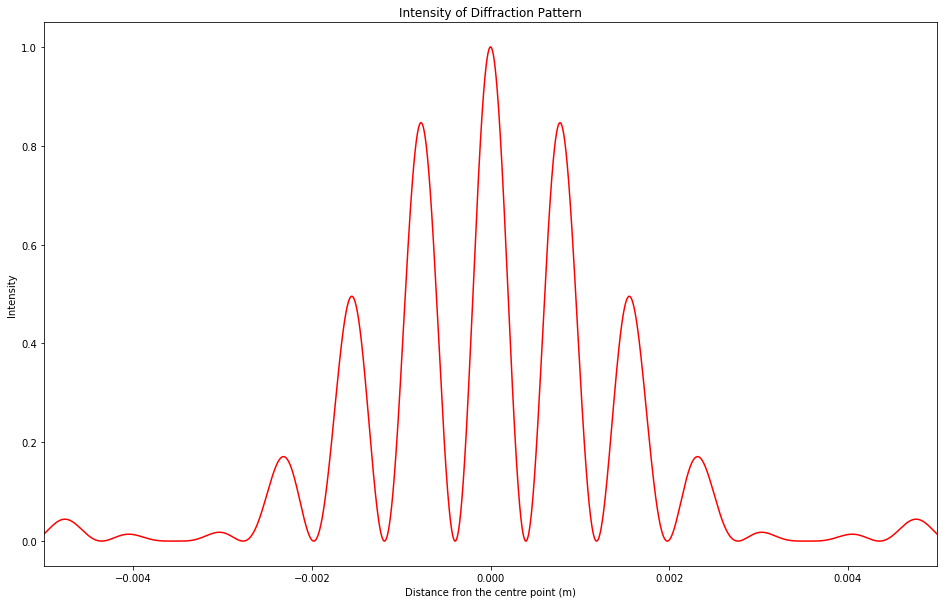

In [2]:
import math
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt1 
import numpy as np

a = 0.09*10**-3;             #Width of the slit 0.09mm
d = 0.4*10**-3;              #Distance between the slits 0.4mm
L = 480*10**-3;              #Distance from slits to the screen is 480mm

while True:
    y = float(input("Enter a wavelength between 400 and 700 nm :  "))
    if 400 <= y <= 700:          #An if statement specifying the colormap I will be using for ranges of y
        if y <= 460:
            gcolour = "violet"   #The color of the graph
            figcolour = "Purples"#I didn't know how to do it for the diffraction pattern so I chose a colormap of similar color
        elif 461 <= y <= 500: 
            gcolour = "blue"
            figcolour = "Blues"
        elif 501 <= y <= 578:
            gcolour = "green"
            figcolour = "Greens"
        elif 579 <= y <= 542:
            gcolour = "yellow"
            figcolour = "Wistia"
        elif 543 <= y <= 600:
            gcolour = "orange"
            figcolour = "Oranges"
        elif 601 <= y:
            gcolour = "red"
            figcolour = "Reds"
        
        break
    else:
        print("Try again.")
        
y = y*(10**(-9))
I = [[] for y in range(2000)] #Here we set up a 2-d array
ScreenDimension = []          #Set up the array which will store the viewing screen dimensional information
IterationStep = 10000;        #How many iteration steps will we need? In the lab?
RangeFromZero = int(IterationStep/2);

for Step in range(-RangeFromZero,RangeFromZero):  # We want to step around the maximum intensity s0 negative ranges needed
    x = (Step)/1000000                            # Convert x to real units. In this case millimeters.
    theta = math.asin(x/L)                        #Find the angle theta from the centre of the slits to the point on the screen.
    if theta == 0:                                
       theta = 0.0000000000000001
   
    Intensity = ((math.sin(math.pi * (a/y) * math.sin(theta)))/ (math.pi * (a/y) * math.sin(theta)) )**2 * (math.cos(math.pi * (d/y)*math.sin(theta)))**2
    ScreenDimension.append(x)   #Append the value to our array for plotting
    for row in range(2000):     #Append to all of the rows in the 2-D array at column(Step)
        I[row].append(Intensity) 
        
x_min = min(ScreenDimension)    
x_max = max(ScreenDimension)


plt.figure(figsize=(16,10))                        #Set a figure size.
plt.title("Diffraction Pattern")
plt.xlabel("Distance from the centre point (m)")
fig = plt.imshow(I, cmap = figcolour, vmin = -1, vmax = 1, extent=(x_min,x_max,0,0.001))#Plot our image and set its display limits
fig.axes.get_yaxis().set_visible(False)     #Hide this as it is meaningless here

plt1.figure(figsize=(16,10))                #Set a figure size.
plt1.plot(ScreenDimension, I[1], color = gcolour)       #Plot our figure
plt1.xlim(x_min, x_max)                     #Set the display limits on the x-axis
plt1.ylabel("Intensity")
plt1.title("Intensity of Diffraction Pattern")
plt1.xlabel("Distance fron the centre point (m)")
plt1.show()


